# Chapter 8. Exploratory data analysis
## Notebook for Python

### 8.1 Simple exploratory data analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
#url='data/ZA6928_v1-0-0.csv'
url="http://cssbook.net/d/ZA6928_v1-0-0.csv"
d=pd.read_csv(url, header=0, sep= ';', low_memory= False)
print ("Shape of my original data=", d.shape)

#Select and rename columns
d2 = d[['survey', 'uniqid', 'p1', 'tnscntry', 'd7', 'd8', 'd10', 'd11', 'd15a', 'd25', 'd40a', 'qd9_4', 'qd9_1']]
d2.columns = ['survey', 'uniqid', 'date', 'country', 'marital_status', 'educational', 'gender', 'age', 'occupation', 'type_community', 'household_composition', 'support_refugees', 'support_migrants']
print('Shape of my filtered data =', d2.shape)

print("Variables:", d2.columns)

Shape of my original data= (33193, 705)
Shape of my filtered data = (33193, 13)
Variables: Index(['survey', 'uniqid', 'date', 'country', 'marital_status', 'educational',
       'gender', 'age', 'occupation', 'type_community',
       'household_composition', 'support_refugees', 'support_migrants'],
      dtype='object')


In [3]:
print("Absolute and relative frequencies of gender:")
print(d2['gender'].value_counts())
df = d2['gender'].value_counts()       
print(df / len(d2['gender'])) 

print("Absolute and relative frequencies of support_refugees:")
print(d2['support_refugees'].value_counts())
df2 = d2['support_refugees'].value_counts()       
print(df2 / len(d2['support_refugees'])) 

Absolute and relative frequencies of gender:
Woman    17716
Man      15477
Name: gender, dtype: int64
Woman    0.533727
Man      0.466273
Name: gender, dtype: float64
Absolute and relative frequencies of support_refugees:
Tend to agree            12695
Tend to disagree          5391
Inap. (not 1 in eu28)     5138
Totally agree             4957
Totally disagree          3574
DK                        1438
Name: support_refugees, dtype: int64
Tend to agree            0.382460
Tend to disagree         0.162414
Inap. (not 1 in eu28)    0.154792
Totally agree            0.149339
Totally disagree         0.107673
DK                       0.043322
Name: support_refugees, dtype: float64


In [4]:
#Replace some categories by missing values
d2['support_refugees']= d2['support_refugees'].replace('Inap. (not 1 in eu28)', np.NaN)
d2['support_refugees']= d2['support_refugees'].replace('DK', np.NaN)


print("Number of missing values in the variable support_refugees:", d2['support_refugees'].isna().sum())

#We then can drop the rows containing missing values from our dataset
d2 = d2.dropna()
print("Shape of my data without missing values", d2.shape)



Number of missing values in the variable support_refugees: 6576
Shape of my data without missing values (26617, 13)


/Users/carlosarcila/opt/anaconda3/envs/R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlosarcila/opt/anaconda3/envs/R/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
print("Crosstab gender and support_refugees:")
print(pd.crosstab(d2['support_refugees'], d2['gender']))

#Replace age values to correct strings and convert to numeric
d2['age']= d2['age'].replace('15 years', '15')
d2['age']= d2['age'].replace('98 years', '98')
d2['age']= d2['age'].replace('99 years (and older)', '99')
d2['age']= pd.to_numeric(d2['age'])
print(type(d2['age']))

print("Summary statistics for group of cases:")
print(d2.groupby(['support_refugees', 'gender'])['age'].mean())

Crosstab gender and support_refugees:
gender             Man  Woman
support_refugees             
Tend to agree     5787   6908
Tend to disagree  2411   2980
Totally agree     2456   2501
Totally disagree  1666   1908
<class 'pandas.core.series.Series'>
Summary statistics for group of cases:
support_refugees  gender
Tend to agree     Man       51.882668
                  Woman     52.137811
Tend to disagree  Man       51.249274
                  Woman     51.516107
Totally agree     Man       50.706840
                  Woman     50.407437
Totally disagree  Man       51.015006
                  Woman     52.426101
Name: age, dtype: float64


### 8.2 Visualizing data

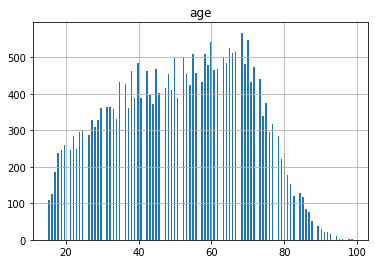

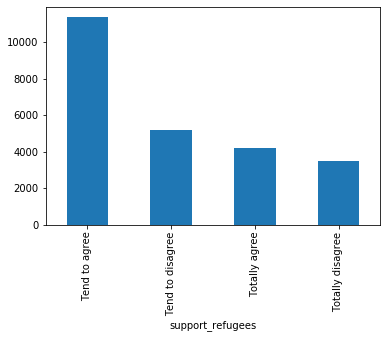

In [6]:
import matplotlib.pyplot as plt
import numpy as np
#Histogram of age
d2.hist(column='age', bins=100, rwidth=0.5)
plt.show()
#Graph bar of support of refugees
d2.groupby('support_refugees')['uniqid'].nunique().plot(kind='bar')
plt.show()

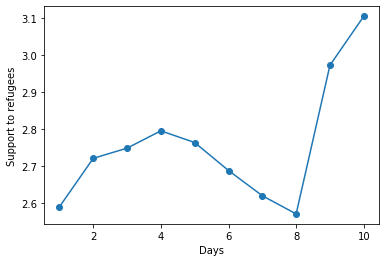

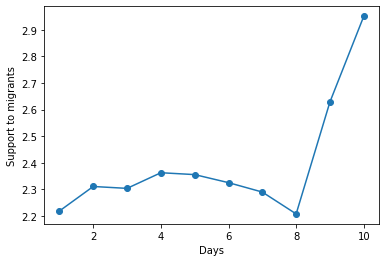

In [7]:
#We transform date, support_refugees and support_migrants into new numerical variables
#Days in order
d2['date_n'] = d2['date']
d2['date_n'] =  d2['date_n'].replace("Sunday, 5th November 2017" , '1')
d2['date_n'] =  d2['date_n'].replace("Monday, 6th November 2017" , '2')
d2['date_n'] =  d2['date_n'].replace("Tuesday, 7th November 2017" , '3')
d2['date_n'] =  d2['date_n'].replace("Wednesday, 8th November 2017" , '4')
d2['date_n'] =  d2['date_n'].replace("Thursday, 9th November 2017" , '5')
d2['date_n'] =  d2['date_n'].replace("Friday, 10th November 2017" , '6')
d2['date_n'] =  d2['date_n'].replace("Saturday, 11th November 2017" , '7')
d2['date_n'] =  d2['date_n'].replace("Sunday, 12th November 2017" , '8')
d2['date_n'] =  d2['date_n'].replace("Monday, 13th November 2017" , '9')
d2['date_n'] =  d2['date_n'].replace("Tuesday, 14th November 2017" , '10')
d2['date_n'] =  pd.to_numeric(d2['date_n'])

#Level of support to refugees from 1 to 4	
d2['support_refugees_n'] = d2['support_refugees']
d2['support_refugees_n'] = d2['support_refugees_n'].replace("Totally disagree" , "1")
d2['support_refugees_n'] = d2['support_refugees_n'].replace("Tend to disagree" , "2")
d2['support_refugees_n'] = d2['support_refugees_n'].replace("Tend to agree" , "3")
d2['support_refugees_n'] = d2['support_refugees_n'].replace("Totally agree" , "4")
d2['support_refugees_n'] = pd.to_numeric(d2['support_refugees_n'])

#Level of support to migrants from 1 to 4 (and replace missing valued by NaN)
d2['support_migrants']= d2['support_migrants'].replace('Inap. (not 1 in eu28)', np.NaN)
d2['support_migrants']= d2['support_migrants'].replace('DK', np.NaN)
d2['support_migrants_n'] = d2['support_migrants']
d2['support_migrants_n'] = d2['support_migrants_n'].replace("Totally disagree" , "1")
d2['support_migrants_n'] = d2['support_migrants_n'].replace("Tend to disagree" , "2")
d2['support_migrants_n'] = d2['support_migrants_n'].replace("Tend to agree" , "3")
d2['support_migrants_n'] = d2['support_migrants_n'].replace("Totally agree" , "4")
d2['support_migrants_n'] = pd.to_numeric(d2['support_migrants_n'])

#We get the average of support to each group by day
mean_support_refugees_by_day = d2.groupby(['date_n'])['support_refugees_n'].mean()
mean_support_refugees_by_day= mean_support_refugees_by_day.to_frame()

mean_support_migrants_by_day = d2.groupby(['date_n'])['support_migrants_n'].mean()
mean_support_migrants_by_day= mean_support_migrants_by_day.to_frame()

#We can use line graphs to plot both means as a time series

#Two indepedent figures using base R (function plot)
plt.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day['support_refugees_n'], marker='o')
plt.xlabel('Days')
plt.ylabel('Support to refugees')
plt.show()

plt.plot(mean_support_migrants_by_day.index, mean_support_migrants_by_day['support_migrants_n'], marker='o')
plt.xlabel('Days')
plt.ylabel('Support to migrants')
plt.show()

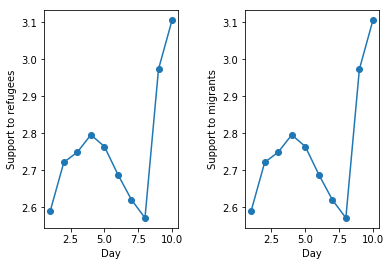

In [25]:
#Combine the figures using function subplots()
#fig, (ax1, ax2) = plt.subplots(1,2)
#plt.subplots_adjust(wspace=0.5)
#ax1.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day['support_refugees_n'], marker='o')
#ax1.set(xlabel='Day', ylabel='Support to refugees')
#ax2.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day['support_refugees_n'], marker='o')
#ax2.set(xlabel='Day', ylabel='Support to migrants')
#plt.show()

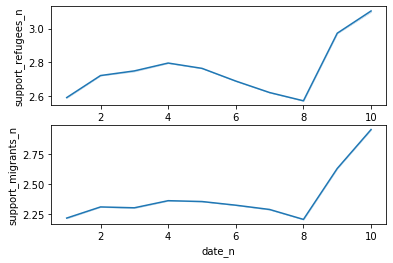

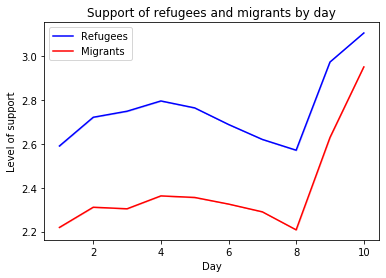

In [14]:
##Combine seaborn graphs using subplots
import seaborn as sns
#plt.subplots(2,2)
f, axes = plt.subplots(2,1)
sns.lineplot(x="date_n", y='support_refugees_n', data=d2, ci=0, ax=axes[0])
sns.lineplot(x="date_n", y='support_migrants_n', data=d2, ci=0, ax=axes[1])
plt.show()

#Integrate the two graphs
sns.lineplot(x="date_n", y='support_refugees_n', data=d2, color="blue", ci=0, label="Refugees")
sns.lineplot(x="date_n", y='support_migrants_n', data=d2, color="red", ci=0, label="Migrants")
plt.xlabel("Day")
plt.ylabel("Level of support")
plt.title("Support of refugees and migrants by day") 
plt.show()

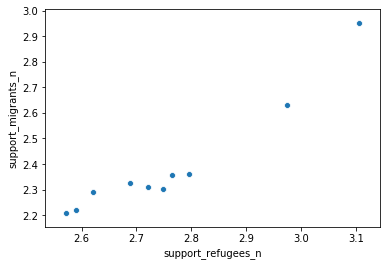

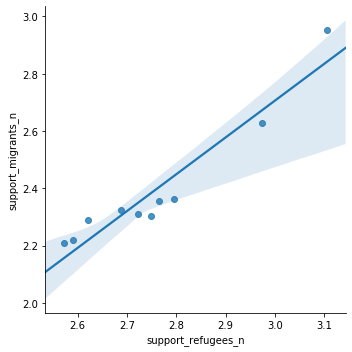

In [15]:
#Scatterplot of avergare support of refugees and migrants by year
supports = pd.concat([mean_support_refugees_by_day,mean_support_migrants_by_day], axis=1) #Create a DF of means
sns.scatterplot(x="support_refugees_n", y="support_migrants_n", data=supports)

#And aading the regression line
sns.lmplot(x="support_refugees_n", y="support_migrants_n", data=supports)
plt.show()

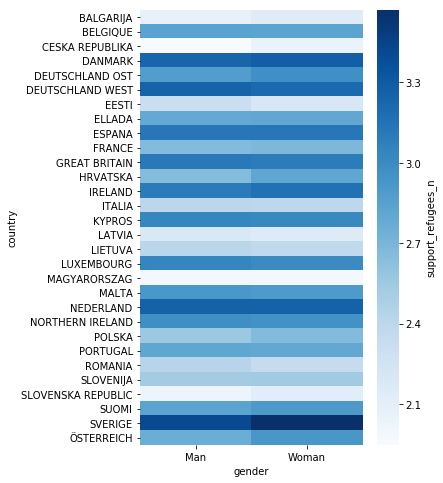

In [33]:
#Heatmap to plot 3 variables: country, gender and support of refugees
pivot_data = pd.pivot_table(d2, values='support_refugees_n', 
                     index=['country'], 
                     columns='gender')

plt.figure(figsize=(5,8))
sns.heatmap(pivot_data, cmap='Blues', cbar_kws={'label': 'support_refugees_n'}) #annot=True for labels
plt.show()

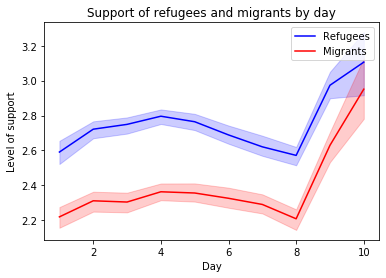

In [16]:
#Add ribbons
sns.lineplot(x="date_n", y='support_refugees_n', data=d2, color="blue", ci=100, label="Refugees")
sns.lineplot(x="date_n", y='support_migrants_n', data=d2, color="red", ci=100, label="Migrants")
plt.xlabel("Day")
plt.ylabel("Level of support")
plt.title("Support of refugees and migrants by day") 
plt.show()

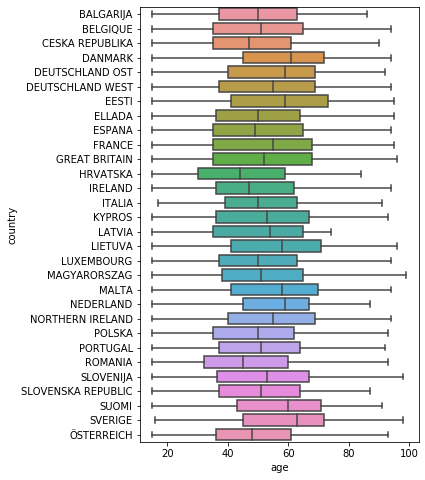

In [17]:
#Get bloxplots of age by country
d2 = d2.sort_values(by ='country' )#order the countries
plt.figure(figsize=(5,8))
sns.boxplot(x="age", y="country", data=d2)
plt.show()

Text(0.5, 1, 'Support of refugees by country')

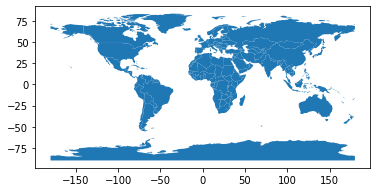

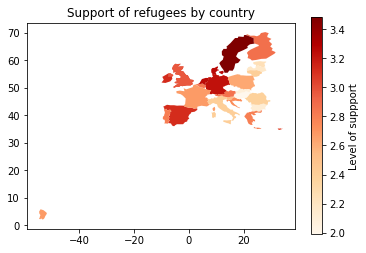

In [22]:
#Plotting geospatial data
#install geopandas, descartes
import geopandas as gpd

#Generate dataframe with average level of support to refugees by country
mean_support_refugees_by_country = d2.groupby(['country'])['support_refugees_n'].mean()
supports_country = mean_support_refugees_by_country.to_frame()
supports_country = supports_country.reset_index()

#Recode country names to standard names of naturalearthdata.com (library geopandas)
#https://ramiro.org/notebook/metal-bands-map/
supports_country['country'] =  supports_country['country'].replace("BALGARIJA" , 'Bulgaria')
supports_country['country'] =  supports_country['country'].replace("BELGIQUE" , "Belgium")
supports_country['country'] =  supports_country['country'].replace("CESKA REPUBLIKA" , "Czech republic")
supports_country['country'] =  supports_country['country'].replace("DANMARK" , "Denmark")
supports_country['country'] =  supports_country['country'].replace("DEUTSCHLAND OST" , "Germany")
supports_country['country'] =  supports_country['country'].replace("DEUTSCHLAND WEST" , "Germany")
supports_country['country'] =  supports_country['country'].replace("EESTI" , "Estonia")
supports_country['country'] =  supports_country['country'].replace("ELLADA" , "Greece")
supports_country['country'] =  supports_country['country'].replace("ESPANA" , "Spain")
supports_country['country'] =  supports_country['country'].replace("FRANCE" , "France")
supports_country['country'] =  supports_country['country'].replace("GREAT BRITAIN" , "United Kingdom")
supports_country['country'] =  supports_country['country'].replace("HRVATSKA" , "Croatia")
supports_country['country'] =  supports_country['country'].replace("IRELAND" , "Ireland")
supports_country['country'] =  supports_country['country'].replace("ITALIA" , "Italy")
supports_country['country'] =  supports_country['country'].replace("KYPROS" , "Cyprus")
supports_country['country'] =  supports_country['country'].replace("LATVIA" , "Latvia")
supports_country['country'] =  supports_country['country'].replace("LIETUVA" , "Lithuania")
supports_country['country'] =  supports_country['country'].replace("LUXEMBOURG" , "Luxemburg")
supports_country['country'] =  supports_country['country'].replace("MAGYARORSZAG" , "Hungary")
supports_country['country'] =  supports_country['country'].replace("MALTA" , "Malta")
supports_country['country'] =  supports_country['country'].replace("NEDERLAND" , "Netherlands")
supports_country['country'] =  supports_country['country'].replace("NORTHERN IRELAND" , "United Kingdom")
supports_country['country'] =  supports_country['country'].replace("POLSKA" , "Poland")
supports_country['country'] =  supports_country['country'].replace("PORTUGAL" , "Portugal")
supports_country['country'] =  supports_country['country'].replace("ROMANIA" , "Romania")
supports_country['country'] =  supports_country['country'].replace("SLOVENIJA" , "Slovenia")
supports_country['country'] =  supports_country['country'].replace("SLOVENSKA REPUBLIC" , "Slovakia")
supports_country['country'] =  supports_country['country'].replace("SUOMI" , "Finland")
supports_country['country'] =  supports_country['country'].replace("SVERIGE" , "Sweden")
supports_country['country'] =  supports_country['country'].replace("ÖSTERREICH" , "Austria")
supports_country['name'] =  supports_country['country'] #Create a column "name" to match the maps

#Load a world map and plot it
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map.plot();

#Select EU Contries included in the Eurobarometer
some_eu_countries = ["Portugal", "Spain", "France", "Germany", "Austria", "Belgium", "United Kingdom", 
"Netherlands", "Denmark", "Poland", "Italy",  "Croatia", "Slovenia", "Hungary", "Slovakia", "Czech republic", "Greece",
"Finland", "Ireland", "Luxemburg", "Sweden", "Bulgaria", "Latvia", "Estonia", "Lithuania", "Malta", "Romania", "Cyprus"]
#some_eu_maps
some_eu_maps = world_map.loc[world_map['name'].isin(some_eu_countries)]
#some_eu_maps
#some_eu_maps.plot();

#Joint my map with Eurobarometer data
support_map = pd.merge(supports_country, some_eu_maps , on='name')
support_map = gpd.GeoDataFrame(support_map, geometry=support_map['geometry']) #Convert to GeoDataFrame
#type(support_map)
#support_map 

#Plot the support of refugees by country in a Map
#http://geopandas.org/mapping.html
support_map.plot(column='support_refugees_n', legend=True, legend_kwds={'label': "Level of suppport"}, cmap='OrRd').set_title('Support of refugees by country')

### 8.3 Clustering and dimensionality reduction

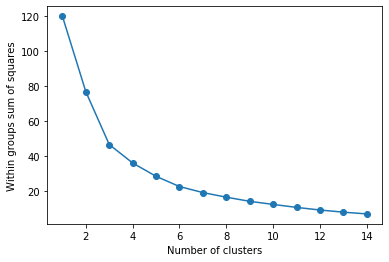

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#Prepare data
#transform educational into continuous
d2['educational_n']= d2['educational']
d2['educational_n']= d2['educational_n'].replace('DK', np.NaN)
d2['educational_n']= d2['educational_n'].replace('Still studying', np.NaN)
d2['educational_n']= d2['educational_n'].replace('No full-time education', np.NaN)
d2['educational_n']= d2['educational_n'].replace('Refusal', np.NaN)
d2['educational_n'] = d2['educational_n'].replace('2 years' , '2')
d2['educational_n'] = d2['educational_n'].replace('75 years' , '75')
d2['educational_n'] = pd.to_numeric(d2['educational_n'])

#select variables for matrix
#We get the average of each variable by country
d3 = d2.groupby(['country'])['support_refugees_n', 'support_migrants_n', 'age', 'educational_n'].mean()
scaler = StandardScaler()
d3_s = scaler.fit_transform(d3) # Scaling the data

# For 1 to 15 cluster centers
wss = []
for i in range(1, 15):
    km_out = KMeans(n_clusters=i, n_init=20)
    km_out.fit(d3_s)
    wss.append(km_out.inertia_)

# Plot total within sum of squares vs. number of clusters
plt.plot(range(1, 15), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
K-means clustering with 3 clusters of sizes  [ 3 14 13]
Cluster means:  [[ 1.15358521  0.94691976  1.75152298  2.58803424]
 [ 0.63315969  0.6097146   0.02941389 -0.39383348]
 [-0.94807625 -0.87513567 -0.4358741  -0.17311031]]
Clustering vector: 
 [['BALGARIJA' 2]
 ['BELGIQUE' 1]
 ['CESKA REPUBLIKA' 2]
 ['DANMARK' 0]
 ['DEUTSCHLAND OST' 1]
 ['DEUTSCHLAND WEST' 1]
 ['EESTI' 2]
 ['ELLADA' 2]
 ['ESPANA' 1]
 ['FRANCE' 1]
 ['GREAT BRITAIN' 1]
 ['HRVATSKA' 2]
 ['IRELAND' 1]
 ['ITALIA' 2]
 ['KYPROS' 1]
 ['LATVIA' 2]
 ['LIETUVA' 2]
 ['LUXEMBOURG' 1]
 ['MAGYARORSZAG' 2]
 ['MALTA' 1]
 ['NEDERLAND' 1]
 ['NORTHERN IRELAND' 1]
 ['POLSKA' 2]
 ['PORTUGAL' 1]
 ['ROMANIA' 2]
 ['SLOVENIJA' 2]
 ['SLOVENSKA REPUBLIC' 2]
 ['SUOMI' 0]
 ['SVERIGE' 0]
 ['ÖSTERREICH' 1]]
Within cluster sum of squares:  46.51926958302829


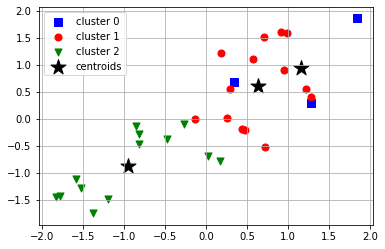

In [27]:
# Compute k-means with k = 3
km_res = KMeans(n_clusters=3, n_init=25).fit(d3_s)
print (km_res)
print("K-means clustering with 3 clusters of sizes ", np.bincount(km_res.labels_[km_res.labels_>=0]))
print ('Cluster means: ', km_res.cluster_centers_)
print ('Clustering vector: \n', np.column_stack((d3.index, km_res.labels_)))
print ('Within cluster sum of squares: ', km_res.inertia_)

##Visualize the clusters
plt.scatter(
    d3_s[km_res.labels_ == 0, 0], d3_s[km_res.labels_ == 0, 1],
    s=50, c='blue',
    marker='s', edgecolor='blue',
    label='cluster 0'
)

plt.scatter(
    d3_s[km_res.labels_ == 1, 0], d3_s[km_res.labels_ == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='red',
    label='cluster 1'
)

plt.scatter(
    d3_s[km_res.labels_ == 2, 0], d3_s[km_res.labels_ == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='green',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km_res.cluster_centers_[:, 0], km_res.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [39]:
# PAM clustering
#Install scikit-learn-extra from https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
#from sklearn_extra.cluster import KMedoids
#pam_res = KMedoids(n_clusters=3).fit(d3_s)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)


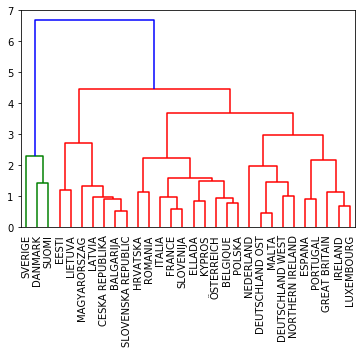

In [40]:
# Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
hc_res = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete') #more methods: "ward", "average", "single" 
hc_res.fit_predict(d3_s)
print(hc_res)

#Plot the dendogram
dendrogram = sch.dendrogram(sch.linkage(d3_s, method='complete'), labels=list(d3.index), leaf_rotation=90) 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)


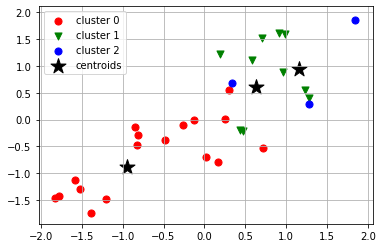

In [41]:
#Re-run the HC with 3 clusters and plot it
hc_res = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc_res.fit_predict(d3_s)
print(hc_res)

#Visualize the clusters
plt.scatter(
    d3_s[hc_res.labels_ == 0, 0], d3_s[hc_res.labels_ == 0, 1],
    s=50, c='red',
    marker='o', edgecolor='red',
    label='cluster 0'
)

plt.scatter(
    d3_s[hc_res.labels_ == 1, 0], d3_s[hc_res.labels_ == 1, 1],
    s=50, c='green',
    marker='v', edgecolor='green',
    label='cluster 1'
)

plt.scatter(
    d3_s[hc_res.labels_ == 2, 0], d3_s[hc_res.labels_ == 2, 1],
    s=50, c='blue',
    marker='o', edgecolor='blue',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km_res.cluster_centers_[:, 0], km_res.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
#PCA
from sklearn.decomposition import PCA
pca_m = PCA()
pca = pca_m.fit(d3_s)

pca_n = PCA()
pca = pca_n.fit_transform(d3_s)
pca_df = pd.DataFrame(data = pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df.index = d3.index
print(pca_df.head())
pca_df_2 = pd.DataFrame(data = pca_n.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df_2.index = d3.columns
print(pca_df_2)

                      PC1       PC2       PC3       PC4
country                                                
BALGARIJA       -1.788627  0.936346 -0.477785 -0.137473
BELGIQUE        -0.026414 -0.326434 -0.234343  0.241888
CESKA REPUBLIKA -2.342731  0.668160 -0.778370 -0.132096
DANMARK          2.924986  2.004805 -0.577218  0.423345
DEUTSCHLAND OST  0.340923  0.145955  1.212520  0.303222
                         PC1       PC2       PC3       PC4
support_refugees_n  0.589552 -0.349154  0.083083  0.723613
support_migrants_n  0.531349 -0.511350 -0.093788 -0.668874
age                 0.436255  0.548834  0.692476 -0.170119
educational_n       0.424002  0.561599 -0.710477  0.007107


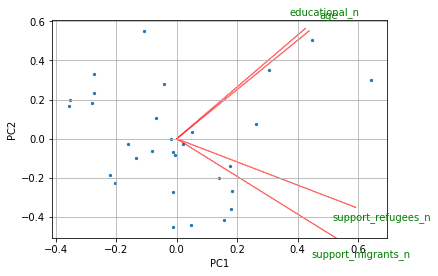

In [43]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pca_n.components_[0:2, :]),list(d3.columns))
plt.show()

Proportion of variance explained: [0.55845835 0.28109336 0.12073549 0.03971281]


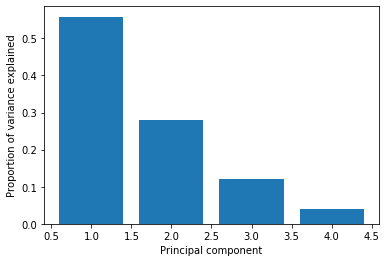

In [45]:
print("Proportion of variance explained:", pca_n.explained_variance_ratio_)

plt.bar(range(1,len(pca_n.explained_variance_ratio_ )+1),pca_n.explained_variance_ratio_ )
plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal component')
plt.show()

Cumulative explained variance: [0.55845835 0.83955171 0.96028719 1.        ]


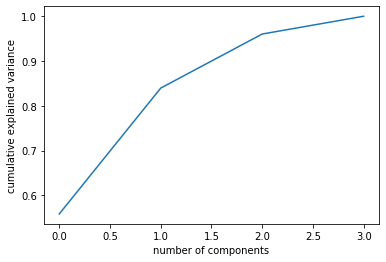

In [47]:
print ("Cumulative explained variance:", np.cumsum(pca_n.explained_variance_ratio_))

plt.plot(np.cumsum(pca_n.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance') #PC1 begings in 0
plt.show()

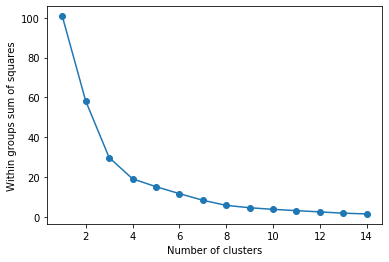

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
K-means clustering with 3 clusters of sizes  [13 13  4]
Cluster means:  [[ 0.45281646 -0.81776391]
 [-1.28749477  0.44208455]
 [ 2.7127045   1.22095791]]
Clustering vector: 
 [['BALGARIJA' 1]
 ['BELGIQUE' 0]
 ['CESKA REPUBLIKA' 1]
 ['DANMARK' 2]
 ['DEUTSCHLAND OST' 0]
 ['DEUTSCHLAND WEST' 0]
 ['EESTI' 1]
 ['ELLADA' 1]
 ['ESPANA' 0]
 ['FRANCE' 0]
 ['GREAT BRITAIN' 0]
 ['HRVATSKA' 1]
 ['IRELAND' 0]
 ['ITALIA' 1]
 ['KYPROS' 0]
 ['LATVIA' 1]
 ['LIETUVA' 1]
 ['LUXEMBOURG' 0]
 ['MAGYARORSZAG' 1]
 ['MALTA' 0]
 ['NEDERLAND' 2]
 ['NORTHERN IRELAND' 0]
 ['POLSKA' 1]
 ['PORTUGAL' 0]
 ['ROMANIA' 1]
 ['SLOVENIJA' 1]
 ['SLOVENSKA REPUBLIC' 1]
 ['SUOMI' 2]
 ['SVERIGE' 2]
 ['ÖSTERREICH' 0]]
Within cluster sum of squares:  29.898981786512984


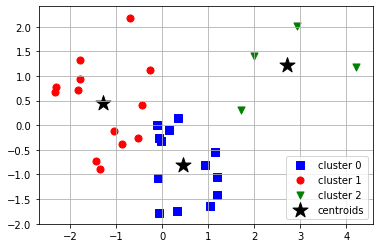

In [48]:
#Generate a new dataset with only two variables (PC1, PC2)
d5 = pca[:,0:2]
d5[0:5]

#Get optimal number of clusters
wss = []
for i in range(1, 15):
    km_out = KMeans(n_clusters=i, n_init=20)
    km_out.fit(d5)
    wss.append(km_out.inertia_)

# Plot total within sum of squares vs. number of clusters
plt.plot(range(1, 15), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

# Compute again k-means with k = 3 and visualize the clusters
km_res_5 = KMeans(n_clusters=3, n_init=25).fit(d5)
print (km_res_5)
print("K-means clustering with 3 clusters of sizes ", np.bincount(km_res_5.labels_[km_res_5.labels_>=0]))
print ('Cluster means: ', km_res_5.cluster_centers_)
print ('Clustering vector: \n', np.column_stack((d3.index, km_res_5.labels_)))
print ('Within cluster sum of squares: ', km_res_5.inertia_)

##Visualize the clusters
plt.scatter(
    d5[km_res_5.labels_ == 0, 0], d5[km_res_5.labels_ == 0, 1],
    s=50, c='blue',
    marker='s', edgecolor='blue',
    label='cluster 0'
)

plt.scatter(
    d5[km_res_5.labels_ == 1, 0], d5[km_res_5.labels_ == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='red',
    label='cluster 1'
)

plt.scatter(
    d5[km_res_5.labels_ == 2, 0], d5[km_res_5.labels_ == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='green',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km_res_5.cluster_centers_[:, 0], km_res_5.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()